In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('TehranHouse.csv')

# checking null values

In [ ]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [ ]:
df1 = df.drop('Price', axis = 1)

In [ ]:
df1.shape

(3479, 7)

In [ ]:
df1.isnull().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,23
Price(USD),0


In [ ]:
df1 = df1.dropna()

In [ ]:
df1.shape

(3456, 7)

Checking the unique values for each column

In [ ]:
for column in ['Room', 'Parking', 'Warehouse', 'Elevator', 'Address']:
    unique_values = df1[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Room': [1 2 3 0 4 5]
Unique values in column 'Parking': [ True False]
Unique values in column 'Warehouse': [ True False]
Unique values in column 'Elevator': [ True False]
Unique values in column 'Address': ['Shahran' 'Pardis' 'Shahrake Qods' 'Shahrake Gharb'
 'North Program Organization' 'Andisheh' 'West Ferdows Boulevard' 'Narmak'
 'Saadat Abad' 'Zafar' 'Islamshahr' 'Pirouzi' 'Shahrake Shahid Bagheri'
 'Moniriyeh' 'Velenjak' 'Amirieh' 'Southern Janatabad' 'Salsabil'
 'Zargandeh' 'Feiz Garden' 'Water Organization' 'ShahrAra' 'Gisha' 'Ray'
 'Abbasabad' 'Ostad Moein' 'Farmanieh' 'Parand' 'Punak' 'Qasr-od-Dasht'
 'Aqdasieh' 'Pakdasht' 'Railway' 'Central Janatabad'
 'East Ferdows Boulevard' 'Pakdasht KhatunAbad' 'Sattarkhan' 'Baghestan'
 'Shahryar' 'Northern Janatabad' 'Daryan No'
 'Southern Program Organization' 'Rudhen' 'West Pars' 'Afsarieh'
 'Marzdaran' 'Dorous' 'Sadeghieh' 'Chahardangeh' 'Baqershahr' 'Jeyhoon'
 'Lavizan' 'Shams Abad' 'Fatemi' 'Keshavarz Boulev

In [ ]:
df1['Address'].nunique()

192

#Encoding categorical values to numericals

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['Parking_LE'] = le.fit_transform(df1['Parking'])
df2 = df1.drop('Parking', axis = 1)

In [ ]:
le = LabelEncoder()
df2['Warehouse_LE'] = le.fit_transform(df2['Warehouse'])
df2 = df2.drop('Warehouse', axis = 1)

In [ ]:
le = LabelEncoder()
df2['Elevator_LE'] = le.fit_transform(df2['Elevator'])
df2 = df2.drop('Elevator', axis = 1)

In [ ]:
frequency = df2['Address'].value_counts()
print(frequency.to_string())

Address
Punak                            161
Pardis                           146
West Ferdows Boulevard           145
Gheitarieh                       141
Shahran                          130
Saadat Abad                      129
Parand                           127
Shahr-e-Ziba                     109
Southern Janatabad                93
Central Janatabad                 91
Jeyhoon                           91
Persian Gulf Martyrs Lake         88
Ostad Moein                       83
Andisheh                          83
East Ferdows Boulevard            74
Shahrake Qods                     69
Niavaran                          68
Pasdaran                          67
Pirouzi                           63
Salsabil                          60
Shahrake Gharb                    59
Farmanieh                         57
Heravi                            46
Ekhtiarieh                        42
Islamshahr                        39
Yousef Abad                       38
Feiz Garden                   

In [ ]:
variables_to_keep = ['Punak', 'Pardis', 'West Ferdows Boulevard', 'Gheitarieh', 'Shahran',
                     'Saadat Abad', 'Parand', 'Shahr-e-Ziba', 'Southern Janatabad', 'Central Janatabad',
                     'Jeyhoon', 'Persian Gulf Martyrs Lake', 'Andisheh', 'Ostad Moein', 'East Ferdows Boulevard',
                     'Shahrake Qods', 'Niavaran', 'Pasdaran', 'Pirouzi', 'Salsabil', 'Shahrake Gharb',
                     'Farmanieh']
df2['Address'] = df2['Address'].apply(lambda x: x if x in variables_to_keep else 'other')

In [ ]:
# one hot encoding for the 'Address' feature
encoded_columns = pd.get_dummies(df2['Address'], prefix='Address')
df2 = pd.concat([df2, encoded_columns], axis=1)
df2 = df2.drop('Address', axis=1)

In [ ]:
df2.head()

,Area,Room,Price(USD),Parking_LE,Warehouse_LE,Elevator_LE,Address_Andisheh,Address_Central Janatabad,Address_East Ferdows Boulevard,Address_Farmanieh,...,Address_Punak,Address_Saadat Abad,Address_Salsabil,Address_Shahr-e-Ziba,Address_Shahrake Gharb,Address_Shahrake Qods,Address_Shahran,Address_Southern Janatabad,Address_West Ferdows Boulevard,Address_other
0,63,1,61666.67,1,1,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,60,1,61666.67,1,1,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,79,2,18333.33,1,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,30083.33,1,1,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,123,2,233333.33,1,1,1,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


#Data analysis

In [ ]:
df2['Area'] = df2['Area'].str.replace(',', '').str.replace(' ', '').astype(float)

In [ ]:
df2.head()

,Area,Room,Price(USD),Parking_LE,Warehouse_LE,Elevator_LE,Address_Andisheh,Address_Central Janatabad,Address_East Ferdows Boulevard,Address_Farmanieh,...,Address_Punak,Address_Saadat Abad,Address_Salsabil,Address_Shahr-e-Ziba,Address_Shahrake Gharb,Address_Shahrake Qods,Address_Shahran,Address_Southern Janatabad,Address_West Ferdows Boulevard,Address_other
0,63.0,1,61666.67,1,1,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,60.0,1,61666.67,1,1,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,79.0,2,18333.33,1,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95.0,2,30083.33,1,1,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,123.0,2,233333.33,1,1,1,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


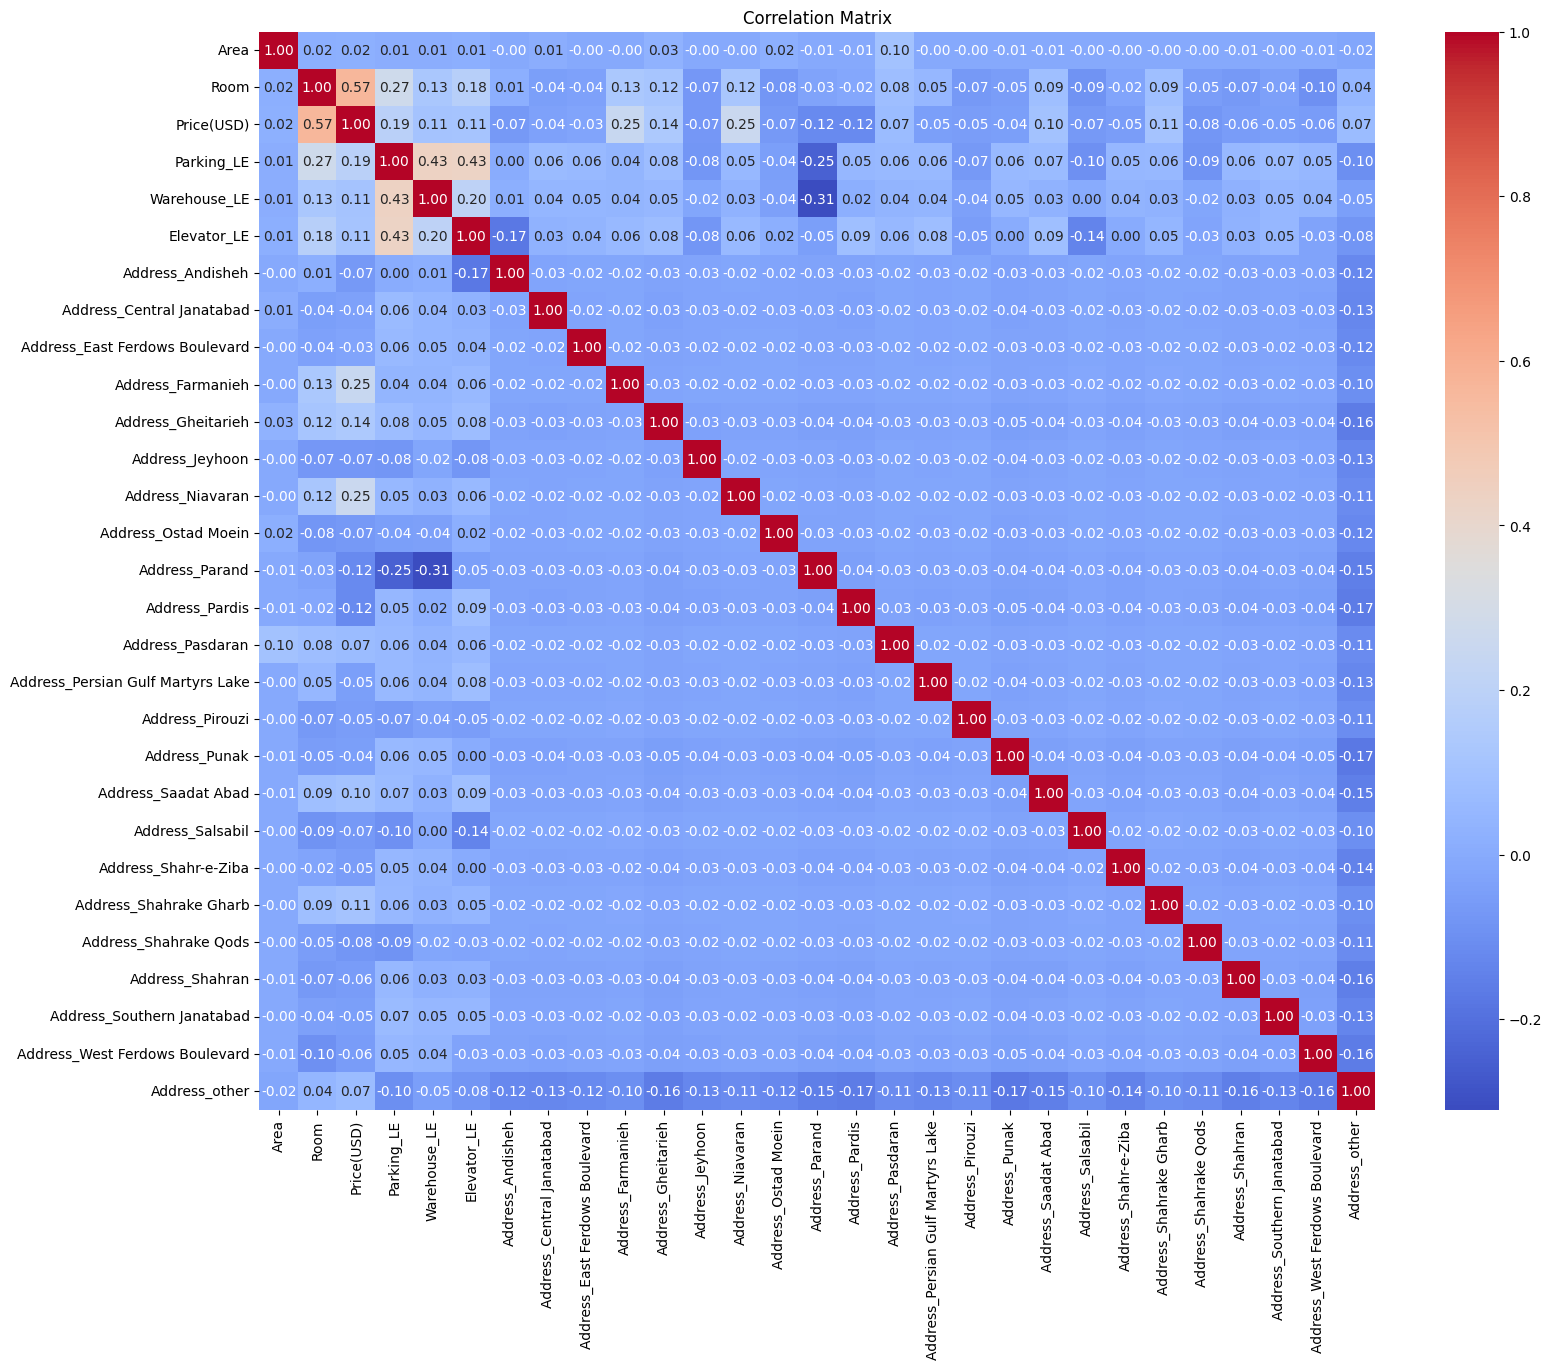

In [ ]:
# checking the correlation between each feature and the price
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df2.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

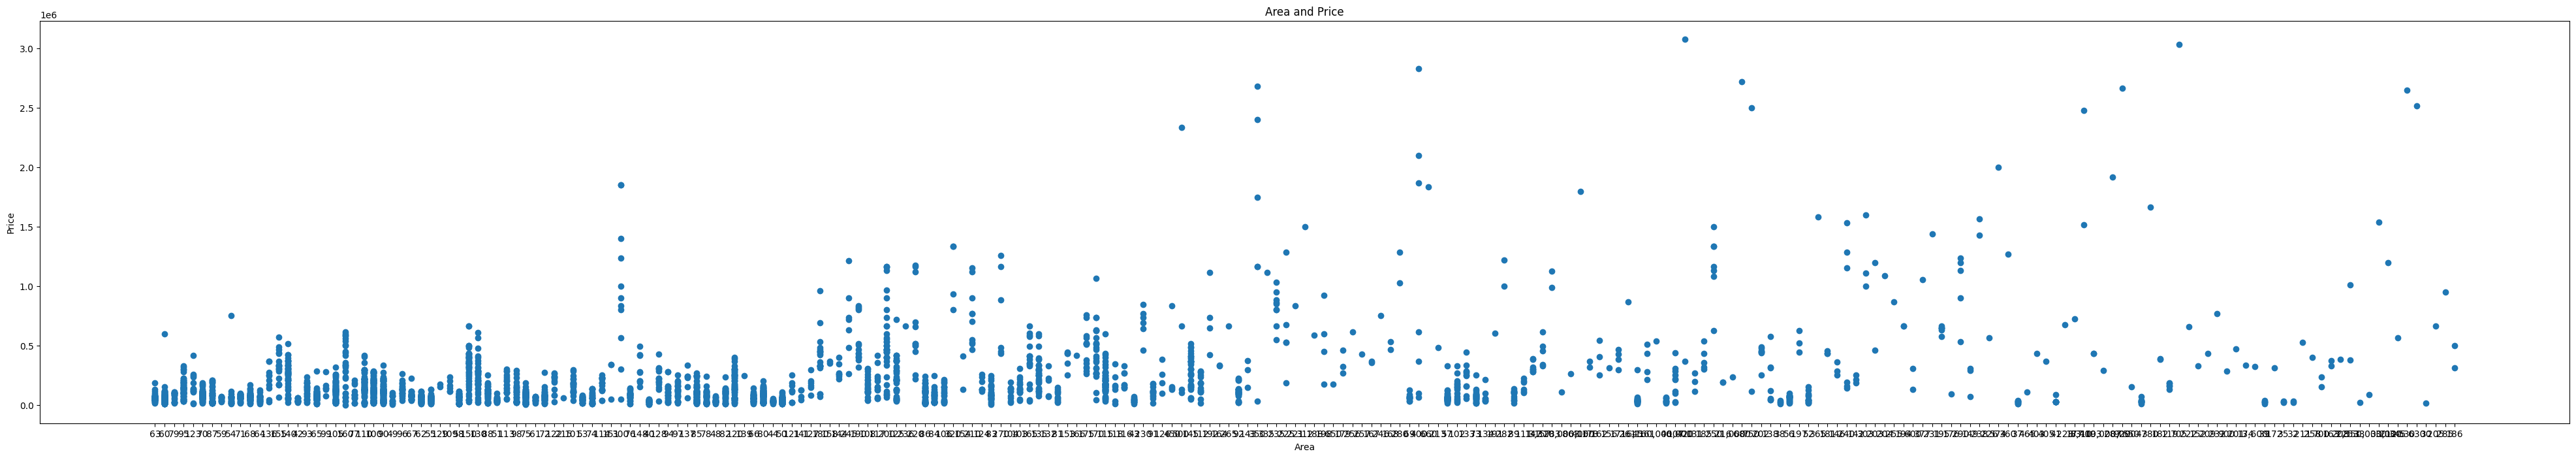

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 8))
plt.scatter(df1['Area'], df1['Price(USD)'])
plt.title('Area and Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

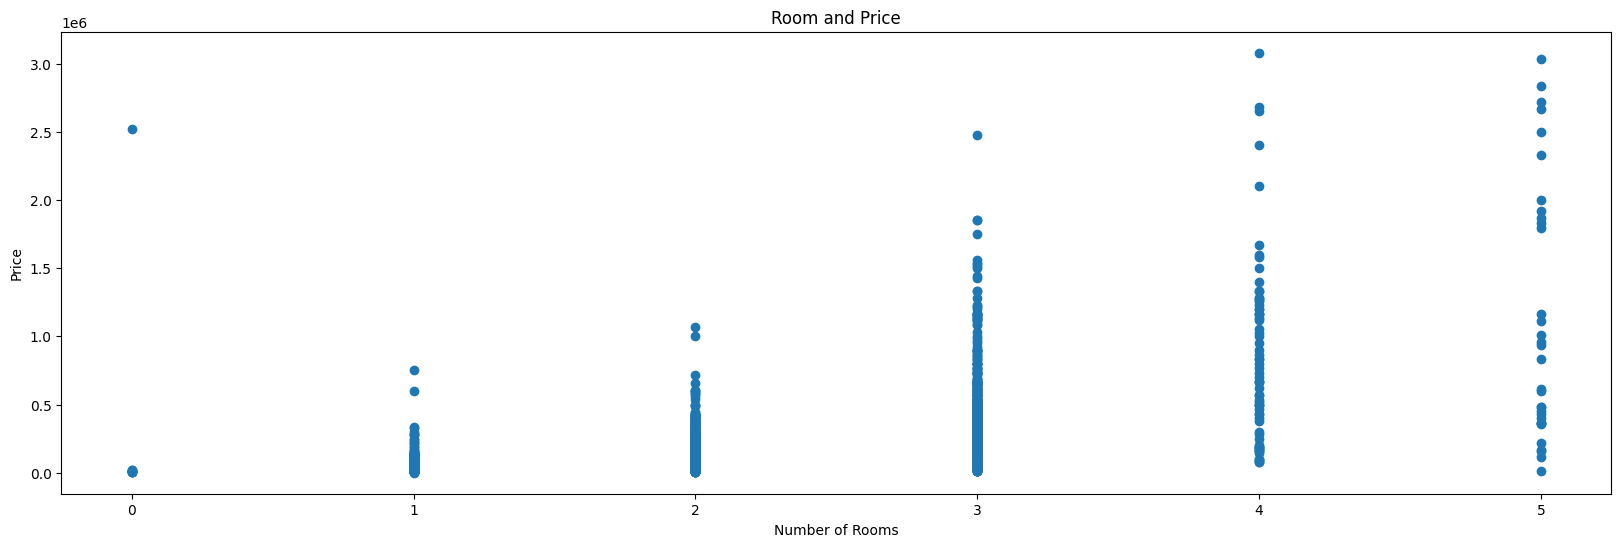

In [ ]:
plt.figure(figsize=(20, 6))
plt.scatter(df1['Room'], df1['Price(USD)'])
plt.title('Room and Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

#**Model Comparison**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X = df2.drop('Price(USD)', axis=1)
y = np.log1p(df2['Price(USD)'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Regression Based Models
Linear and Ridge Regression



In [ ]:
"""
# Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
"""

Mean Squared Error: 0.34862300999547347
R-squared: 0.7268001004881408


In [ ]:
"""
# Ridge Regression Model

from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
"""

Mean Squared Error: 0.3486229623552083
R-squared: 0.7268001378216367


#Tree Based Models
Random Forest and GBM

In [ ]:
"""
# Random Forest Without Hyperparameter Tuning

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
"""

Mean Squared Error: 0.2983310328302493
R-squared: 0.7662116215692374


In [ ]:

# Random Forest with Hyperparameter Tunning using GridSearch

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestRegressor(random_state=42)

grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          scoring='neg_mean_squared_error', cv=5, verbose=2)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_sa

In [ ]:
"""
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
"""

Mean Squared Error: 0.2724839596021094
R-squared: 0.7864667900639825


In [ ]:

# Gradient Boosting Machine (GBM) without Hyperparameter Tunning
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.2474648153700661
R-squared: 0.8060731484915449


In [ ]:

# Gradient Boosting Machine (GBM) with Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = GradientBoostingRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   scoring='neg_mean_squared_error', cv=5, verbose=2, n_iter=20, random_state=42)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators

In [ ]:

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.2386529187097833
R-squared: 0.8129786286608814


In [ ]:
import pickle

with open('prediction_model.pickle', 'wb') as f:
    pickle.dump(best_model, f)


#Neural Networks

In [ ]:

import tensorflow as tf
from tensorflow import keras

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

model = keras.Sequential([
    keras.layers.Dense(28, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1) # Output layer with 1 neuron
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='mean_squared_error')


In [ ]:

model.fit(X_train, y_train, epochs=100, batch_size=32)

y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Epoch 1/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 120.1871
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 83.9413
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.9166
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.8832
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.6190
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6666
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4381
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9285
Epoch 9/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2857
Epoch 10/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6438
Epoch 11/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7767
Epoch 12/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0801
Epoch 13/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9346
Epoch 14/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0114
Epoch 15/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.748

#Ensemble Learning

In [ ]:
"""
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Converting X_train and X_test to numerical dtype
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Training individual models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Making predictions with individual models
rf_pred = rf_model.predict(X_test)
gbm_pred = gbm_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Combining predictions (e.g., averaging)
ensemble_pred = (rf_pred + gbm_pred + xgb_pred) / 3

# Evaluating the ensemble model
mse = mean_squared_error(y_test, ensemble_pred)
r2 = r2_score(y_test, ensemble_pred)

print(f"Ensemble Mean Squared Error: {mse}")
print(f"Ensemble R-squared: {r2}")
"""

Ensemble Mean Squared Error: 0.24576326795056178
Ensemble R-squared: 0.8074065733392888


#xgboost

In [ ]:
"""
# XGBoost without hyperparameter tunning
import numpy as np
import pandas as pd
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
"""

Mean Squared Error: 0.23757905427836454
R-squared: 0.8138201670744152


In [ ]:
"""
# XGBoost with hyperparameter tunning
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1]
}

# Initialize the XGBoost regressor model
model = XGBRegressor(random_state=42)

# Initialize RandomizedSearchCV
# n_iter is the number of parameter settings that are sampled
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                   scoring='neg_mean_squared_error', cv=5, verbose=2,
                                   n_iter=50, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model from the search
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)
"""

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=500, reg_alpha=0.1, reg_lambda=0.001, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, gamma=0

In [ ]:
"""
# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error with best model: {mse}")
print(f"R-squared with best model: {r2}")
"""

Mean Squared Error with best model: 0.24258802527513634
R-squared with best model: 0.8098948657209744


#SVR

In [ ]:
"""
# SVR without hyperparameter tunning
import numpy as np
import pandas as pd
from sklearn.svm import SVR

# Create and train the SVM model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
"""

Mean Squared Error: 0.3230309949124307
R-squared: 0.7468553915863505


In [ ]:
"""
# SVR with hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import numpy as np

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'C': np.logspace(-3, 2, 6), # Regularization parameter [1]
    'gamma': np.logspace(-3, 2, 6), # Kernel coefficient [1]
    'epsilon': [0.01, 0.1, 0.2] # Epsilon in the epsilon-SVR model
}

# Initialize the SVR model
model = SVR(kernel='rbf')

# Initialize RandomizedSearchCV
# n_iter is the number of parameter settings that are sampled
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                   scoring='neg_mean_squared_error', cv=5, verbose=2,
                                   n_iter=20, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model from the search
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)
"""

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..................C=10.0, epsilon=0.01, gamma=100.0; total time=   0.5s
[CV] END ..................C=10.0, epsilon=0.01, gamma=100.0; total time=   0.5s
[CV] END ..................C=10.0, epsilon=0.01, gamma=100.0; total time=   0.5s
[CV] END ..................C=10.0, epsilon=0.01, gamma=100.0; total time=   0.5s
[CV] END ..................C=10.0, epsilon=0.01, gamma=100.0; total time=   0.5s
[CV] END ...................C=0.001, epsilon=0.1, gamma=10.0; total time=   0.5s
[CV] END ...................C=0.001, epsilon=0.1, gamma=10.0; total time=   0.5s
[CV] END ...................C=0.001, epsilon=0.1, gamma=10.0; total time=   0.5s
[CV] END ...................C=0.001, epsilon=0.1, gamma=10.0; total time=   0.5s
[CV] END ...................C=0.001, epsilon=0.1, gamma=10.0; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.01, gamma=10.0; total time=   0.6s
[CV] END ..................C=0.001, epsilon=0.0

In [ ]:
"""
# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error with best model: {mse}")
print(f"R-squared with best model: {r2}")
"""

Mean Squared Error with best model: 0.32217964275228506
R-squared with best model: 0.7475225573153252
